# Leveraging NLP-Based Sentiment Analysis to Predict Financial Market Returns

This project aims to evaluate whether natural language processing techniques (specifically sentiment analysis using FinBERT) can be leveraged to predict the short-term movements of major financial indices.

#### 🔍 Objective

To assess whether the emotional tone (positive, neutral, negative) extracted from financial news articles correlates with, and potentially helps forecast, daily returns of indices such as the S&P 500, NASDAQ, Dow Jones, DAX, FTSE 100, Nikkei 225, and CAC 40.



#### 🧠 NLP & Machine Learning Approach

##### -> Sentiment Analysis via FinBERT

We use the FinBERT model, a BERT-based transformer pretrained and fine-tuned specifically on financial texts.
For each financial news article, we classify its sentiment as *positive, neutral, or negative*.

Sentiments are aggregated by date and index/topic to compute:

    - Proportion of each sentiment (p_pos, p_neg, p_neu)
    - A net sentiment score (p_pos - p_neg)
    - Volume of articles per day (as a proxy for news intensity)

##### -> Data Integration

Financial news articles are collected using the NewsAPI client searched by relevant  terms (financial index). Each article is processed with FinBERT to extract sentiment (positive, neutral, negative). These results are then aggregated daily by topic/date. In parallel, historical index returns are retrieved via the Yahoo Finance API. Finally, sentiment features (proportions, net score, volume) are merged with financial returns from j to j-10, creating a unified dataset to try predicting financial returns of the index.

##### -> Machine Learning Model for returns prediction

A Random Forest Classifier is trained to predict whether the next day's return will be positive or negative.


#### 🚀 Possible Next Steps & Real-World Implementation

This approach opens the door to rule-based trading strategies powered by sentiment signals.


For example:

“Buy index X if net sentiment is strongly positive and article volume is high.”


To make this actionable, a backtesting framework can simulate real trading scenarios using model outputs. However, current limitations such as a small sample size, limited historical depth with free version of NewsAPI, and narrow coverage of topics restrict the robustness of our conclusions.


Moving forward, possible improvements should focus on:

    - Collecting more comprehensive and longer-term datasets (with a special focus on news provider and hitorical depth of data)
    - Refining time alignment between news sentiment and market reactions (and maybe higher frequency data)
    - Exploring deep learning architectures that combine textual sentiment with financial time-series data

These enhancements are key to building a scalable, data-driven decision system for market prediction and strategy automation.

------------------------------------------------------------

## Testing the architecture :

<u>Practical information:</u> we have included the option of using data already retrieved and processed by FinBERT with the “use_cache” argument, as well as the option of using a trained financial returns prediction model using “load_pretrained_model” function.

### I. Load and initialize the pipeline

In [1]:
from src.data_pipeline import Pipeline
pipe = Pipeline(use_cache=True, pretrained_model_name="random_forest_model")

c:\Users\thibc\OneDrive\Documents\Dev\NLP-Financial-News-Impact\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### II.1. Train a model on a given period

This step includes :

    - Fetching the data from NewsAPI and YahooFinanceAPI
    - Performing sentiment analysis on news data with FinBERT
    - Creating features for the model
    - Fitting the model on this data

Please note that the free version of NewsAPI is very limited, you might need to change the request date due to the limited historic available.

c:\Users\thibc\OneDrive\Documents\Dev\NLP-Financial-News-Impact\src\data_pipeline.py:141: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = price_df.pct_change().iloc[1:, :]


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.75      0.60      0.67        10

    accuracy                           0.57        14
   macro avg       0.54      0.55      0.53        14
weighted avg       0.63      0.57      0.59        14



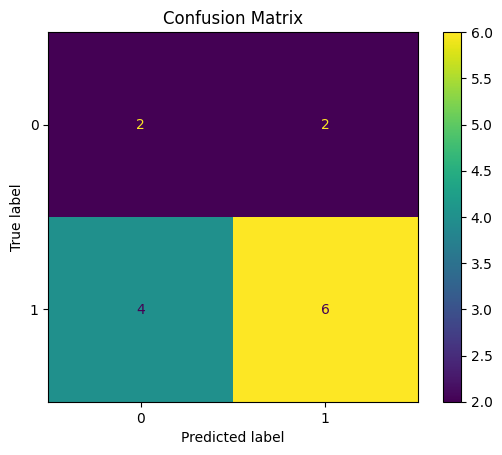

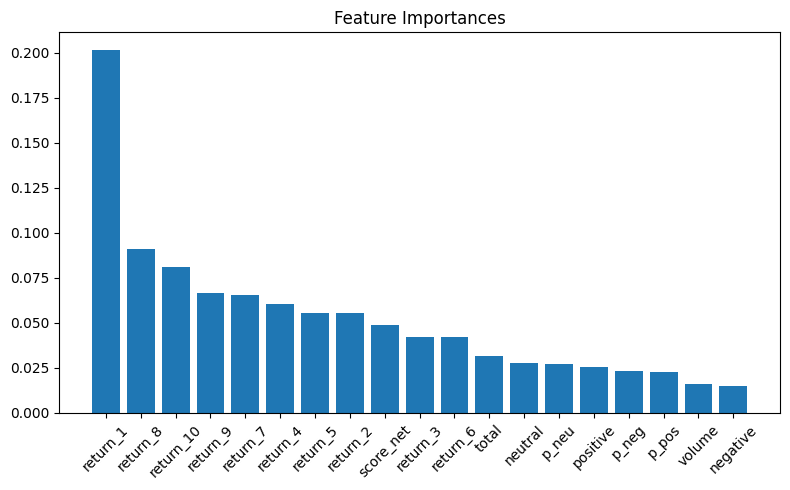

In [2]:
pipe.fit(start_date="2025-05-29", end_date="2025-06-28", save_model=True, model_analysis=True)

### II.2. Alternative : use a pre-trained model 

When a model is trainted and the 'save_model' argument is set to True, one can use this latter to predict.

In [3]:
pipe.load_pretrained_model(pretrained_model_name="random_forest_model.pkl")

### III. Predicting Out-of-Sample

In [4]:
pipe.predict(date="2025-06-25", ticker="^GSPC")

[ERROR] Term: SP500, Page: 2, Error: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.'}


100%|██████████| 28/28 [00:01<00:00, 15.26it/s]


➡️  Downloading ^GSPC from 2025-06-05 to 2025-06-25
Prediction for ^GSPC on 2025-06-25: Positive


### FinBERT prediction analysis

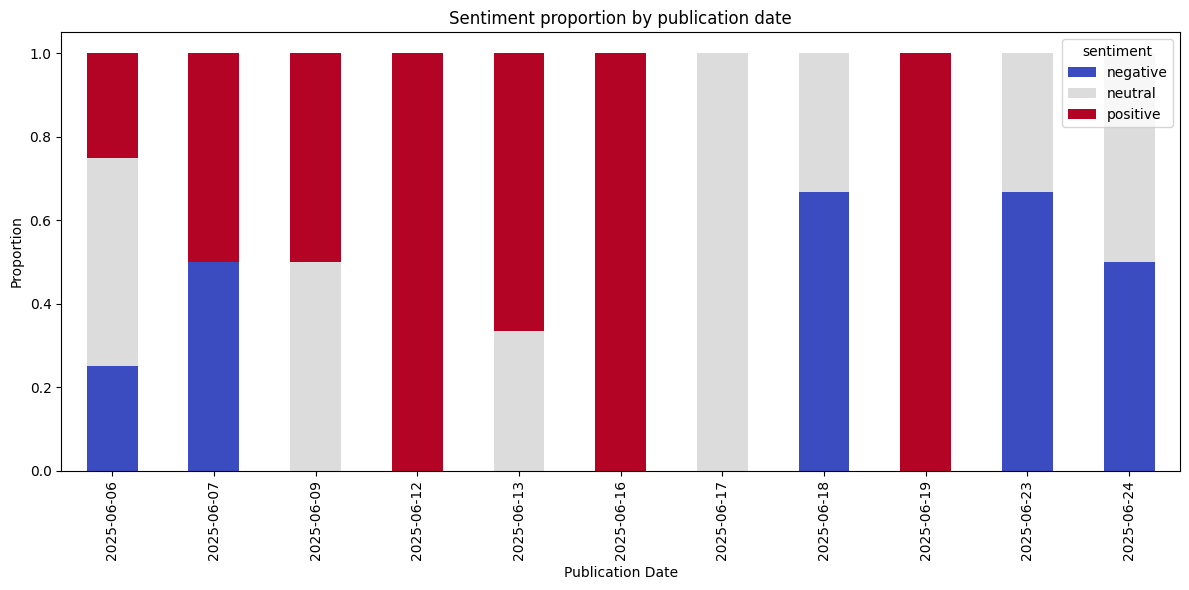

Aggregated data :
sentiment    negative  neutral  positive
search_term                             
SP500              10       10         8

Article examples :
Title : Lululemon Stock Slides After Sportswear Brand Cuts Profit Outlook
Description : 
Sentiment : neutral
---
Title : Stock Market Today: Dow Futures Rise, With Jobs Report, Trump-Musk Feud in Focus
Description : 
Sentiment : negative
---
Title : Stock Market Today: Dow Jones Rises Amid Israel-Iran Attacks; Nvidia, Palantir, Tesla Rally (Live Coverage)
Description : 
Sentiment : positive
---


In [5]:
from src.analysis import finbert_analysis
finbert_analysis(sentiment_analysis_path="data/articles/articles_with_sentiment.json")